In [226]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
stock = 'SBIN.NS'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,199.520035,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,199.594070,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,200.791443,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,199.668076,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,199.071579,10453820


In [228]:
price = data['Close']
price

Date
2010-01-04    229.119995
2010-01-05    229.205002
2010-01-06    230.580002
2010-01-07    229.289993
2010-01-08    228.604996
                 ...    
2023-05-08    583.599976
2023-05-09    573.500000
2023-05-10    572.200012
2023-05-11    573.450012
2023-05-12    578.150024
Name: Close, Length: 3297, dtype: float64

<Axes: xlabel='Date'>

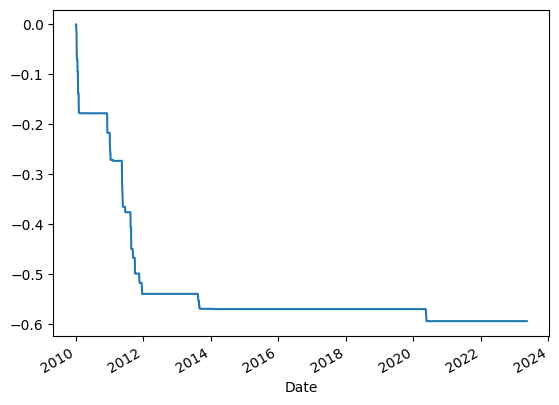

In [229]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [230]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -59.49247890013467 %


In [231]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00037101,  0.005999  , ..., -0.00226676,
        0.00218455,  0.00819603])

In [232]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00037101, 1.00637224, ..., 2.49738139, 2.50283705,
       2.52335037])

In [233]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 252.3350369828508%


In [234]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.424215
2012-12-31    0.473395
2013-12-31   -0.259484
2014-12-31    0.765355
2015-12-31   -0.280263
2016-12-31    0.114725
2017-12-31    0.238609
2018-12-31   -0.045176
2019-12-31    0.127915
2020-12-31   -0.176180
2021-12-31    0.674668
2022-12-31    0.332827
2023-12-31   -0.057927
Freq: A-DEC, Name: Close, dtype: float64

In [235]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.040018
2010-03-31    0.052626
2010-04-30    0.107064
2010-05-31   -0.013865
                ...   
2023-01-31   -0.098094
2023-02-28   -0.055465
2023-03-31    0.001817
2023-04-30    0.104153
2023-05-31   -0.000259
Freq: M, Name: Close, Length: 161, dtype: float64

In [236]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 11.417296162255921%


In [237]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 6.262270873838389


In [238]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.040018
2010-05-31   -0.013865
2010-10-31   -0.027728
2010-11-30   -0.050276
2010-12-31   -0.060257
                ...   
2022-06-30   -0.004700
2022-09-30   -0.001224
2023-01-31   -0.098094
2023-02-28   -0.055465
2023-05-31   -0.000259
Name: Close, Length: 80, dtype: float64

In [239]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 10.860777469476396
